# Reconstruction of DOSY NMR signals - Part I

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random

## 1) Generation of synthetic data


$\underline{\textbf{Q1.}}$ Let's read the signal data from the file "signal.dat" 

In [2]:
N = 200
signal = np.zeros(N)

filepath = 'signal.txt'  
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        signal[cnt-1] = np.float64(line)
        line = fp.readline()
        cnt += 1
    
signal

array([2.0440461e-15, 9.5346375e-15, 4.2731280e-14, 1.8399916e-13,
       7.6122670e-13, 3.0258013e-12, 1.1555667e-11, 4.2401169e-11,
       1.4948199e-10, 5.0632357e-10, 1.6477664e-09, 5.1521838e-09,
       1.5478015e-08, 4.4675295e-08, 1.2389329e-07, 3.3010826e-07,
       8.4507101e-07, 2.0785393e-06, 4.9119223e-06, 1.1152519e-05,
       2.4328910e-05, 5.0991828e-05, 1.0268493e-04, 1.9867402e-04,
       3.6932070e-04, 6.5962097e-04, 1.1319141e-03, 1.8662109e-03,
       2.9562161e-03, 4.4992472e-03, 6.5791799e-03, 9.2434029e-03,
       1.2477289e-02, 1.6182171e-02, 2.0164227e-02, 2.4140963e-02,
       2.7768717e-02, 3.0689178e-02, 3.2586891e-02, 3.3245190e-02,
       3.2586892e-02, 3.0689180e-02, 2.7768719e-02, 2.4140966e-02,
       2.0164233e-02, 1.6182182e-02, 1.2477307e-02, 9.2434342e-03,
       6.5792322e-03, 4.4993339e-03, 2.9563583e-03, 1.8664419e-03,
       1.1322857e-03, 6.6021251e-04, 3.7025309e-04, 2.0012899e-04,
       1.0493282e-04, 5.4430173e-05, 2.9535840e-05, 1.8959282e

$\underline{\textbf{Q2.}}$  We create first T using an exponential sampling strategy:

In [3]:
T_min = 1 
T_max = 1000
T = np.array([T_min*np.exp(-n*(np.log(T_min/T_max))/(N-1)) for n in range(N)],dtype=np.float64)
T

array([   1.        ,    1.03532184,    1.07189132,    1.1097525 ,
          1.148951  ,    1.18953407,    1.2315506 ,    1.27505124,
          1.3200884 ,    1.36671636,    1.4149913 ,    1.4649714 ,
          1.51671689,    1.57029012,    1.62575567,    1.68318035,
          1.74263339,    1.80418641,    1.8679136 ,    1.93389175,
          2.00220037,    2.07292178,    2.1461412 ,    2.22194686,
          2.30043012,    2.38168555,    2.46581108,    2.55290807,
          2.64308149,    2.73644   ,    2.8330961 ,    2.93316628,
          3.03677112,    3.14403547,    3.2550886 ,    3.37006433,
          3.48910121,    3.6123427 ,    3.7399373 ,    3.87203878,
          4.00880633,    4.15040476,    4.2970047 ,    4.44878283,
          4.60592204,    4.7686117 ,    4.93704785,    5.11143348,
          5.29197874,    5.47890118,    5.67242607,    5.87278661,
          6.08022426,    6.29498899,    6.5173396 ,    6.74754405,
          6.98587975,    7.2326339 ,    7.48810386,    7.75259

$\underline{\textbf{Q3.}}$ Display the original signal $\bar{x}$ as a function of T

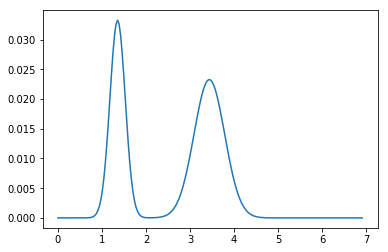

In [4]:
plt.plot(np.log(T),signal)

$\underline{\textbf{Q4.}}$  Create t using a regular sampling strategy 

In [5]:
M = 50 
t_min = 0
t_max = 1.5
t = np.array([t_min + ((m-1)/(M-1))*(t_max - t_min) for m in range(1,M+1)],dtype=np.float64)
t

array([0.        , 0.03061224, 0.06122449, 0.09183673, 0.12244898,
       0.15306122, 0.18367347, 0.21428571, 0.24489796, 0.2755102 ,
       0.30612245, 0.33673469, 0.36734694, 0.39795918, 0.42857143,
       0.45918367, 0.48979592, 0.52040816, 0.55102041, 0.58163265,
       0.6122449 , 0.64285714, 0.67346939, 0.70408163, 0.73469388,
       0.76530612, 0.79591837, 0.82653061, 0.85714286, 0.8877551 ,
       0.91836735, 0.94897959, 0.97959184, 1.01020408, 1.04081633,
       1.07142857, 1.10204082, 1.13265306, 1.16326531, 1.19387755,
       1.2244898 , 1.25510204, 1.28571429, 1.31632653, 1.34693878,
       1.37755102, 1.40816327, 1.43877551, 1.46938776, 1.5       ])

 $\underline{\textbf{Q4.}}$ Construct matrix K using (3)

In [52]:
##### I should change this (no loop) ###########

K = np.zeros((M,N))

for n in range(N):
    for m in range(M):
        K[m,n] = np.exp(- t[m]*T[n])

print(K)
print(K.shape)
print(np.linalg.matrix_rank(K,tol=1e-17))

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [9.69851565e-01 9.68803450e-01 9.67719507e-01 ... 3.95314811e-13
  1.44159827e-13 5.07307125e-14]
 [9.40612058e-01 9.38580124e-01 9.36481044e-01 ... 1.56273800e-25
  2.07820558e-26 2.57360519e-27]
 ...
 [2.37218052e-01 2.25463789e-01 2.13907633e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.30066299e-01 2.18430097e-01 2.07002589e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.23130160e-01 2.11615831e-01 2.00320443e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(50, 200)
50


$\underline{\textbf{Q5.}}$ Simulate the noisy data according to model (2), by taking $w \sim \mathcal{N} (0, \sigma^2 I_{M})$ with $\sigma = 0.01z^{(1)}$ , where $z = K\bar{x}$

In [74]:
x = signal
xmin = min(x)
xmax= max(x)
z = np.dot(K,x)
sigma = 0.01*z[0]
mean = np.zeros(M)
cov  = (sigma**2)*np.eye(M)

w = np.random.multivariate_normal(mean, cov)
y = z + w

$\underline{\textbf{Q6.}}$ Display the resulting noisy data y as a function of t

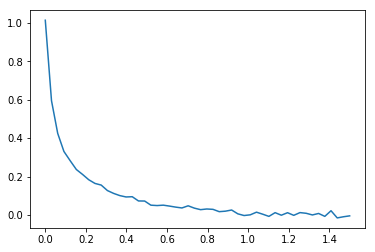

In [8]:
plt.plot(t,y)

## 2) Comparison of regularization strategies

###  Smoothness prior

Defintion of D

In [9]:
D = np.eye(N)

for n in range(N-1):
    D[n+1,n] = -1

D[0,N-1] = -1

$\underline{\textbf{Q3.}}$ Resolving the optimization problem

In [10]:
beta = 1
x_hat = np.dot(np.linalg.inv(np.dot(K.T,K) + beta*np.dot(D.T,D)),np.dot(K.T,y))

In [11]:
def normalized_MSE(x,y):
    return( (np.linalg.norm(x-y)/np.linalg.norm(y))**2)

0.5452619070863907


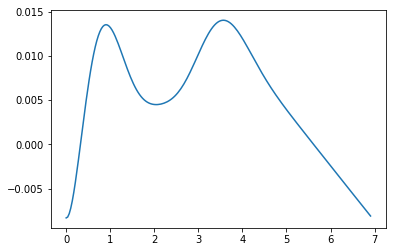

In [12]:
print(normalized_MSE(x_hat,x))
plt.plot(np.log(T),x_hat)

$\underline{\textbf{Q4.}}$ Tunning $\beta$ with a grid search 

MSE : 8.50720675753449, beta : 0.0009999999999999994


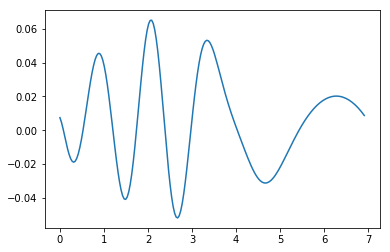

MSE : 2.792020429214104, beta : 0.009999999999999995


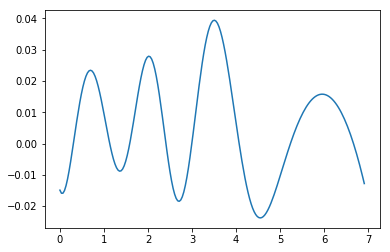

MSE : 0.7375546776309461, beta : 0.09999999999999998


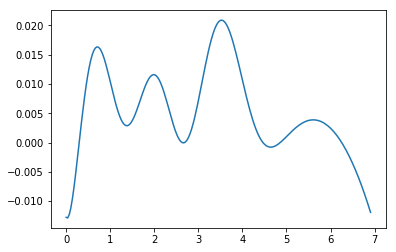

MSE : 0.5452619070863907, beta : 1.0


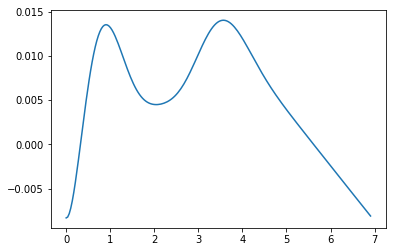

MSE : 0.46628020089001093, beta : 10.000000000000002


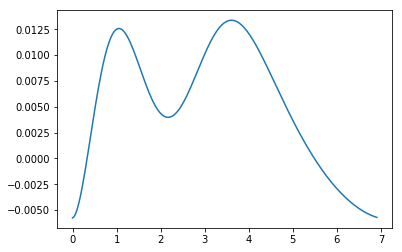

MSE : 0.467816351311863, beta : 100.00000000000004


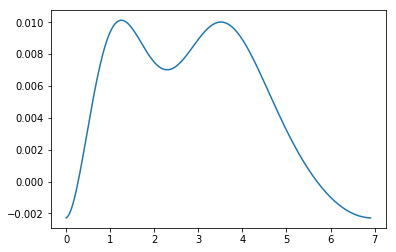

MSE : 0.5644139896729763, beta : 1000.0000000000007


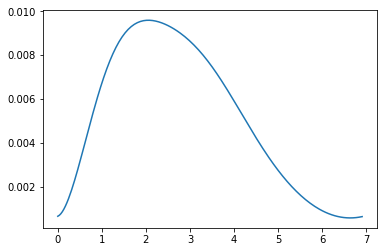

In [13]:
beta_grid = np.exp(np.log(10)*np.linspace(-3,3,7))
errors = np.zeros(beta_grid.shape[0])

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = np.dot(np.linalg.inv(np.dot(K.T,K) + beta*np.dot(D.T,D)),np.dot(K.T,y))
    errors[i] = normalized_MSE(x_hat,x)
    print("MSE : {}, beta : {}".format(normalized_MSE(x_hat,x),beta))
    plt.plot(np.log(T),x_hat)
    plt.show()

### Smoothness prior + constraints 


Objectif : 1e+30, ||Ku-y||^2 : 787.728940203258, ||Du||^2 : 30.451989810070515, ind : 1e+30
Objectif : 404.82715974512246, ||Ku-y||^2 : 809.6430192173659, ||Du||^2 : 0.11300272878969489, ind : 0
Objectif : 399.9895926174946, ||Ku-y||^2 : 799.9680617480236, ||Du||^2 : 0.11123486965668464, ind : 0
Objectif : 395.32900438859645, ||Ku-y||^2 : 790.6470607572555, ||Du||^2 : 0.10948019937314923, ind : 0
Objectif : 390.7934971756615, ||Ku-y||^2 : 781.5762190509904, ||Du||^2 : 0.10775300332630493, ind : 0
Objectif : 386.3732023134775, ||Ku-y||^2 : 772.7357991241637, ||Du||^2 : 0.10605502791399457, ind : 0
Objectif : 382.06469982509236, ||Ku-y||^2 : 764.1189610829275, ||Du||^2 : 0.10438567257256724, ind : 0
Objectif : 377.8646931792279, ||Ku-y||^2 : 755.7191119229619, ||Du||^2 : 0.10274435493906378, ind : 0
Objectif : 373.7700041299511, ||Ku-y||^2 : 747.5298952088906, ||Du||^2 : 0.10113051011540644, ind : 0
Objectif : 369.7775677928758, ||Ku-y||^2 : 739.545181226755, ||Du||^2 : 0.099543589966598

Objectif : 208.82180244817548, ||Ku-y||^2 : 417.64199099257297, ||Du||^2 : 0.016139037779917396, ind : 0
Objectif : 208.239205055838, ||Ku-y||^2 : 416.476820445021, ||Du||^2 : 0.01589666655001284, ind : 0
Objectif : 207.67209305733374, ||Ku-y||^2 : 415.3426202441401, ||Du||^2 : 0.01565870527344214, ind : 0
Objectif : 207.120124718634, ||Ku-y||^2 : 414.2387069276053, ||Du||^2 : 0.015425096627231571, ind : 0
Objectif : 206.5829665958226, ||Ku-y||^2 : 413.1644136132088, ||Du||^2 : 0.015195784363613747, ind : 0
Objectif : 206.06029330360494, ||Ku-y||^2 : 412.119089535882, ||Du||^2 : 0.014970713278651834, ind : 0
Objectif : 205.5729794425055, ||Ku-y||^2 : 411.14448403609657, ||Du||^2 : 0.014748489144009919, ind : 0
Objectif : 205.09980194117813, ||Ku-y||^2 : 410.1981508486626, ||Du||^2 : 0.014530336936874116, ind : 0
Objectif : 204.58035903908305, ||Ku-y||^2 : 409.1592865189043, ||Du||^2 : 0.014315592617720727, ind : 0
Objectif : 204.01818164747618, ||Ku-y||^2 : 408.0349528725781, ||Du||^2 

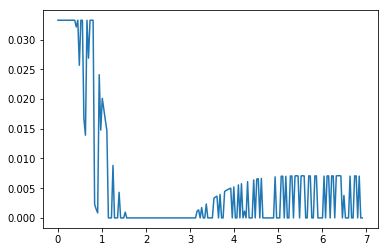

MSE : 366.8123591812494, beta : 0.09999999999999998

Objectif : 1e+30, ||Ku-y||^2 : 5566.621598031966, ||Du||^2 : 35.91603092827823, ind : 1e+30
Objectif : 518.8173894910792, ||Ku-y||^2 : 1037.5966901352692, ||Du||^2 : 0.1059844790310332, ind : 0
Objectif : 509.2614423744605, ||Ku-y||^2 : 1018.4855000365661, ||Du||^2 : 0.10402518286182387, ind : 0
Objectif : 500.0314439043404, ||Ku-y||^2 : 1000.0261883856845, ||Du||^2 : 0.10211832451391983, ind : 0
Objectif : 491.11840750535424, ||Ku-y||^2 : 982.2007828197123, ||Du||^2 : 0.10026171183841615, ind : 0
Objectif : 482.51161850106683, ||Ku-y||^2 : 964.9878546665843, ||Du||^2 : 0.0984534504548239, ind : 0
Objectif : 474.19858962663517, ||Ku-y||^2 : 948.3624299607517, ||Du||^2 : 0.09669197061797316, ind : 0
Objectif : 466.19101916674776, ||Ku-y||^2 : 932.3479086196121, ||Du||^2 : 0.09496795626087452, ind : 0
Objectif : 458.57621177169517, ||Ku-y||^2 : 917.1189123474434, ||Du||^2 : 0.09324689336160011, ind : 0
Objectif : 451.20490514601414, ||

Objectif : 212.12213044931772, ||Ku-y||^2 : 424.2377823566623, ||Du||^2 : 0.018026927879980476, ind : 0
Objectif : 211.6208155355384, ||Ku-y||^2 : 423.2352504561865, ||Du||^2 : 0.017754439954868226, ind : 0
Objectif : 211.13438830605963, ||Ku-y||^2 : 422.26249210524685, ||Du||^2 : 0.017487013686040855, ind : 0
Objectif : 210.6625068556189, ||Ku-y||^2 : 421.31882351872576, ||Du||^2 : 0.017224578375687055, ind : 0
Objectif : 210.20483791826024, ||Ku-y||^2 : 420.4035781896955, ||Du||^2 : 0.01696706450417815, ind : 0
Objectif : 209.76105661351147, ||Ku-y||^2 : 419.5161063817821, ||Du||^2 : 0.016714403702454847, ind : 0
Objectif : 209.33084620124532, ||Ku-y||^2 : 418.6557746388978, ||Du||^2 : 0.016466528725332056, ind : 0
Objectif : 208.91389784488362, ||Ku-y||^2 : 417.82196531165823, ||Du||^2 : 0.016223373425684084, ind : 0
Objectif : 208.5099103826218, ||Ku-y||^2 : 417.0140760998407, ||Du||^2 : 0.015984872729474433, ind : 0
Objectif : 208.02317797248995, ||Ku-y||^2 : 416.04069568644144, |

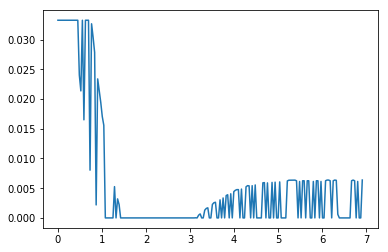

MSE : 365.33557890806145, beta : 0.3593813663804627

Objectif : 1e+30, ||Ku-y||^2 : 2048.957167613679, ||Du||^2 : 29.99880498179677, ind : 1e+30
Objectif : 343.8999085275038, ||Ku-y||^2 : 687.6659631137318, ||Du||^2 : 0.1036382455136131, ind : 0
Objectif : 340.6227448240573, ||Ku-y||^2 : 681.1136339520093, ||Du||^2 : 0.10209107684892352, ind : 0
Objectif : 337.4306004911546, ||Ku-y||^2 : 674.7313127885515, ||Du||^2 : 0.10056771123568976, ind : 0
Objectif : 334.376077020508, ||Ku-y||^2 : 668.6242034029251, ||Du||^2 : 0.09906753224963381, ind : 0
Objectif : 331.3875222867267, ||Ku-y||^2 : 662.649002377458, ||Du||^2 : 0.09758989484463355, ind : 0
Objectif : 328.4633500758939, ||Ku-y||^2 : 656.8025377524871, ||Du||^2 : 0.09613443653314246, ind : 0
Objectif : 325.6020207886914, ||Ku-y||^2 : 651.0817307871399, ||Du||^2 : 0.09470080288505761, ind : 0
Objectif : 322.8020398084963, ||Ku-y||^2 : 645.4835926958558, ||Du||^2 : 0.09328864727430511, ind : 0
Objectif : 320.06195593375327, ||Ku-y||^2 

Objectif : 197.70939722778107, ||Ku-y||^2 : 395.39568653133273, ||Du||^2 : 0.017891626512976246, ind : 0
Objectif : 197.26579337754424, ||Ku-y||^2 : 394.5087844138493, ||Du||^2 : 0.017655024701591387, ind : 0
Objectif : 196.83375620511814, ||Ku-y||^2 : 393.6450108446496, ||Du||^2 : 0.017422145037204385, ind : 0
Objectif : 196.4130544344677, ||Ku-y||^2 : 392.8039033440294, ||Du||^2 : 0.01719293148963267, ind : 0
Objectif : 196.00346179474676, ||Ku-y||^2 : 391.98500944132076, ||Du||^2 : 0.01696732906705638, ind : 0
Objectif : 195.60475689513095, ||Ku-y||^2 : 391.18788642459015, ||Du||^2 : 0.016745283791679624, ind : 0
Objectif : 195.21672310326412, ||Ku-y||^2 : 390.41210109756116, ||Du||^2 : 0.016526742676079096, ind : 0
Objectif : 194.83914842720347, ||Ku-y||^2 : 389.6572295435346, ||Du||^2 : 0.016311653700218122, ind : 0
Objectif : 194.47182540074854, ||Ku-y||^2 : 388.9228568960754, ||Du||^2 : 0.01609996578910523, ind : 0
Objectif : 194.1145509720457, ||Ku-y||^2 : 388.2085771162497, ||

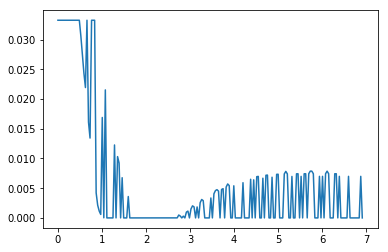

MSE : 362.2473333620993, beta : 1.291549665014884

Objectif : 1e+30, ||Ku-y||^2 : 2657.6055242066536, ||Du||^2 : 26.875201999268967, ind : 1e+30
Objectif : 494.8684666727227, ||Ku-y||^2 : 989.2923525350129, ||Du||^2 : 0.09578203205183498, ind : 0
Objectif : 486.2051946442304, ||Ku-y||^2 : 971.9746402221581, ||Du||^2 : 0.09387929045915351, ind : 0
Objectif : 477.8111366531376, ||Ku-y||^2 : 955.195148034272, ||Du||^2 : 0.09202135029928857, ind : 0
Objectif : 469.6765379257761, ||Ku-y||^2 : 938.9343722785268, ||Du||^2 : 0.09020695025662355, ind : 0
Objectif : 461.7920571722564, ||Ku-y||^2 : 923.1736360093679, ||Du||^2 : 0.08843487647428483, ind : 0
Objectif : 454.13975242589356, ||Ku-y||^2 : 907.8770685266132, ||Du||^2 : 0.08670227794835848, ind : 0
Objectif : 446.7156811410582, ||Ku-y||^2 : 893.0367861876111, ||Du||^2 : 0.08500884258593937, ind : 0
Objectif : 439.51293331558696, ||Ku-y||^2 : 878.6389729976129, ||Du||^2 : 0.08335370654964445, ind : 0
Objectif : 432.52401039103546, ||Ku-y|

Objectif : 198.50674164520015, ||Ku-y||^2 : 396.9522318179369, ||Du||^2 : 0.013196229709070329, ind : 0
Objectif : 197.88204962013134, ||Ku-y||^2 : 395.703836092958, ||Du||^2 : 0.012983301508366959, ind : 0
Objectif : 197.20846569362027, ||Ku-y||^2 : 394.35763477625517, ||Du||^2 : 0.012775067570819292, ind : 0
Objectif : 196.487298699559, ||Ku-y||^2 : 392.9162473088065, ||Du||^2 : 0.012571145873361552, ind : 0
Objectif : 195.78882050758602, ||Ku-y||^2 : 391.52021789659926, ||Du||^2 : 0.01237143586630316, ind : 0
Objectif : 195.11242163578336, ||Ku-y||^2 : 390.1683279243229, ||Du||^2 : 0.012175862462132921, ind : 0
Objectif : 194.45751082686317, ||Ku-y||^2 : 388.859395217814, ||Du||^2 : 0.011984352321241822, ind : 0
Objectif : 193.82351441857978, ||Ku-y||^2 : 387.5922727851411, ||Du||^2 : 0.011796833795765904, ind : 0
Objectif : 193.20684929650747, ||Ku-y||^2 : 386.35979903811074, ||Du||^2 : 0.011612307086290036, ind : 0
Objectif : 192.58776059325115, ||Ku-y||^2 : 385.1224919800377, ||D

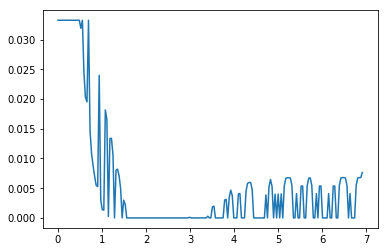

MSE : 343.34183946269945, beta : 4.64158883361278

Objectif : 1e+30, ||Ku-y||^2 : 396.05234508272457, ||Du||^2 : 40.762668689542686, ind : 1e+30
Objectif : 375.0700896016909, ||Ku-y||^2 : 748.0689890583461, ||Du||^2 : 0.1241645871364642, ind : 0
Objectif : 369.84284356558504, ||Ku-y||^2 : 737.6571929471946, ||Du||^2 : 0.12160503151568641, ind : 0
Objectif : 364.76806734722527, ||Ku-y||^2 : 727.5494108473406, ||Du||^2 : 0.11910096560754949, ind : 0
Objectif : 359.8407492851274, ||Ku-y||^2 : 717.7356417426523, ||Du||^2 : 0.11665105215232932, ind : 0
Objectif : 355.05607235504766, ||Ku-y||^2 : 708.2062732068202, ||Du||^2 : 0.1142539949345086, ind : 0
Objectif : 350.40940554777495, ||Ku-y||^2 : 698.9520641854589, ||Du||^2 : 0.11190853719311113, ind : 0
Objectif : 345.89629566134437, ||Ku-y||^2 : 689.9641286058612, ||Du||^2 : 0.10961346010334733, ind : 0
Objectif : 341.5136276228669, ||Ku-y||^2 : 681.2362590955435, ||Du||^2 : 0.10736739844210137, ind : 0
Objectif : 337.2577114328686, ||Ku-y

Objectif : 188.58604152621214, ||Ku-y||^2 : 376.9810691204234, ||Du||^2 : 0.011450984382601469, ind : 0
Objectif : 188.2238108584057, ||Ku-y||^2 : 376.2600662112062, ||Du||^2 : 0.011243657167090377, ind : 0
Objectif : 187.86905256141384, ||Ku-y||^2 : 375.5539480580278, ||Du||^2 : 0.011039925993249232, ind : 0
Objectif : 187.5086782992099, ||Ku-y||^2 : 374.836578593119, ||Du||^2 : 0.010837356698190255, ind : 0
Objectif : 187.16060701894662, ||Ku-y||^2 : 374.143741134331, ||Du||^2 : 0.010639221054396242, ind : 0
Objectif : 186.82453090033013, ||Ku-y||^2 : 373.47482146710445, ||Du||^2 : 0.010445433573703028, ind : 0
Objectif : 186.5001501828975, ||Ku-y||^2 : 372.8292214650673, ||Du||^2 : 0.0102559106548154, ind : 0
Objectif : 186.1871729276046, ||Ku-y||^2 : 372.2063586140608, ||Du||^2 : 0.010070570532299641, ind : 0
Objectif : 185.88531478649176, ||Ku-y||^2 : 371.6056655522946, ||Du||^2 : 0.00988933322722745, ind : 0
Objectif : 185.59429878012114, ||Ku-y||^2 : 371.0265896260181, ||Du||^2 

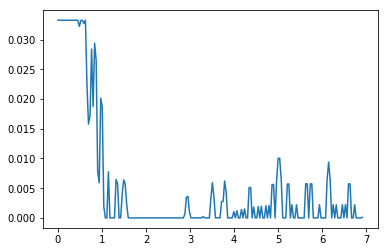

MSE : 365.57050191975594, beta : 16.681005372000598

Objectif : 1e+30, ||Ku-y||^2 : 8596.540969917116, ||Du||^2 : 36.974424956002395, ind : 1e+30
Objectif : 334.10203648573525, ||Ku-y||^2 : 661.6175132777281, ||Du||^2 : 0.10987043763432047, ind : 0
Objectif : 329.18586827307735, ||Ku-y||^2 : 652.0445821136008, ||Du||^2 : 0.10554329707890903, ind : 0
Objectif : 324.44207460877254, ||Ku-y||^2 : 642.8058274833187, ||Du||^2 : 0.10139251750137795, ind : 0
Objectif : 319.8640859349988, ||Ku-y||^2 : 633.888546096165, ||Du||^2 : 0.09741082890377482, ind : 0
Objectif : 315.4456261802846, ||Ku-y||^2 : 625.2806034337852, ||Du||^2 : 0.09359126488809147, ind : 0
Objectif : 311.1806974713024, ||Ku-y||^2 : 616.9704039439295, ||Du||^2 : 0.0899271498093098, ind : 0
Objectif : 307.0635657414696, ||Ku-y||^2 : 608.9468629947488, ||Du||^2 : 0.08641208647990879, ind : 0
Objectif : 303.0887471794522, ||Ku-y||^2 : 601.1993804772835, ||Du||^2 : 0.08303994440174776, ind : 0
Objectif : 299.25099546444113, ||Ku-y

Objectif : 179.5803083905309, ||Ku-y||^2 : 359.05314340232025, ||Du||^2 : 0.0017927640081345825, ind : 0
Objectif : 179.53551683294322, ||Ku-y||^2 : 358.96531418794643, ||Du||^2 : 0.001763507179442209, ind : 0
Objectif : 179.43962286685084, ||Ku-y||^2 : 358.7752321104506, ||Du||^2 : 0.0017350518082122853, ind : 0
Objectif : 179.34908244898799, ||Ku-y||^2 : 358.59578894212086, ||Du||^2 : 0.0017077338695825114, ind : 0
Objectif : 179.27157818807936, ||Ku-y||^2 : 358.442350082848, ||Du||^2 : 0.0016815503202474266, ind : 0
Objectif : 179.13789718884624, ||Ku-y||^2 : 358.1764982798007, ||Du||^2 : 0.00165635874235159, ind : 0
Objectif : 179.0023438579832, ||Ku-y||^2 : 357.9068511820034, ||Du||^2 : 0.001632011748614873, ind : 0
Objectif : 178.87438306376342, ||Ku-y||^2 : 357.65234072957554, ||Du||^2 : 0.0016084725812230776, ind : 0
Objectif : 178.74936574894832, ||Ku-y||^2 : 357.4036754288642, ||Du||^2 : 0.0015856307981722514, ind : 0
Objectif : 178.6094284637271, ||Ku-y||^2 : 357.12516716099

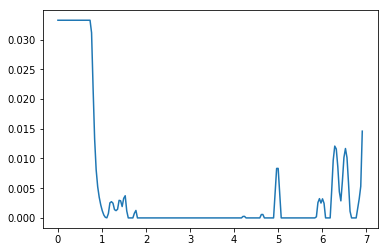

MSE : 379.1278615089461, beta : 59.948425031894104

Objectif : 1e+30, ||Ku-y||^2 : 3027.04128646952, ||Du||^2 : 26.3800327849584, ind : 1e+30
Objectif : 500.5326169495051, ||Ku-y||^2 : 981.2975396885975, ||Du||^2 : 0.0917535087133236, ind : 0
Objectif : 486.16671572833746, ||Ku-y||^2 : 954.8440831955542, ||Du||^2 : 0.08117836359598322, ind : 0
Objectif : 472.53485152987116, ||Ku-y||^2 : 929.5626400876099, ||Du||^2 : 0.07197741033358017, ind : 0
Objectif : 459.5913283253293, ||Ku-y||^2 : 905.4024602899719, ||Du||^2 : 0.0639620055527548, ind : 0
Objectif : 447.30543933883695, ||Ku-y||^2 : 882.3370407890715, ||Du||^2 : 0.05697010888931021, ind : 0
Objectif : 435.6404673969711, ||Ku-y||^2 : 860.322936354926, ||Du||^2 : 0.05086252319328352, ind : 0
Objectif : 424.5583536444178, ||Ku-y||^2 : 839.3097960916697, ||Du||^2 : 0.04551964950499766, ind : 0
Objectif : 414.06862998857383, ||Ku-y||^2 : 819.3391228173439, ||Du||^2 : 0.04083733519753883, ind : 0
Objectif : 404.09647956175434, ||Ku-y||^2

Objectif : 187.22062980964688, ||Ku-y||^2 : 374.26093875553454, ||Du||^2 : 0.0008369753076921204, ind : 0
Objectif : 187.05204605860118, ||Ku-y||^2 : 373.9256538081243, ||Du||^2 : 0.0008282372629055192, ind : 0
Objectif : 186.8958545672964, ||Ku-y||^2 : 373.6150793293996, ||Du||^2 : 0.000819842931467915, ind : 0
Objectif : 186.75030265790988, ||Ku-y||^2 : 373.3257179351289, ||Du||^2 : 0.0008117553133544885, ind : 0
Objectif : 186.61197036432108, ||Ku-y||^2 : 373.0507325770747, ||Du||^2 : 0.0008039610222062032, ind : 0
Objectif : 186.48065474296504, ||Ku-y||^2 : 372.78971948441284, ||Du||^2 : 0.000796450235002061, ind : 0
Objectif : 186.3561587920581, ||Ku-y||^2 : 372.5422866629875, ||Du||^2 : 0.0007892136248797497, ind : 0
Objectif : 186.24086996531383, ||Ku-y||^2 : 372.3132273312066, ||Du||^2 : 0.0007821661997960064, ind : 0
Objectif : 186.1464514419673, ||Ku-y||^2 : 372.1259032452102, ||Du||^2 : 0.0007751436583204318, ind : 0
Objectif : 186.0691831147035, ||Ku-y||^2 : 371.97285267278

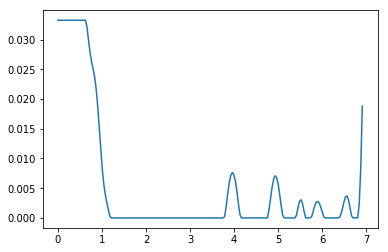

MSE : 380.04647535147245, beta : 215.44346900318848

Objectif : 1e+30, ||Ku-y||^2 : 2371.110996756265, ||Du||^2 : 38.20177452167606, ind : 1e+30
Objectif : 440.320384272846, ||Ku-y||^2 : 800.1771103149395, ||Du||^2 : 0.10392281083380044, ind : 0
Objectif : 416.33277653965234, ||Ku-y||^2 : 783.937445288392, ||Du||^2 : 0.06293477129416229, ind : 0
Objectif : 398.91979902422906, ||Ku-y||^2 : 766.862960833848, ||Du||^2 : 0.04000786541781725, ind : 0
Objectif : 385.46464164303546, ||Ku-y||^2 : 750.1864337227358, ||Du||^2 : 0.026790420404979576, ind : 0
Objectif : 374.4151009776415, ||Ku-y||^2 : 734.2122643362216, ||Du||^2 : 0.018879792435107262, ind : 0
Objectif : 364.8524025350337, ||Ku-y||^2 : 718.9093843493846, ||Du||^2 : 0.013942822015492634, ind : 0
Objectif : 356.2711912111309, ||Ku-y||^2 : 704.2403507898525, ||Du||^2 : 0.010722486173781035, ind : 0
Objectif : 348.3888449421744, ||Ku-y||^2 : 690.1751961129681, ||Du||^2 : 0.008527448618689492, ind : 0
Objectif : 341.0419174255388, ||Ku

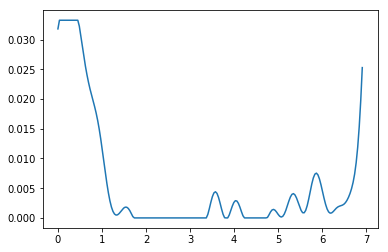

MSE : 349.7043074062286, beta : 774.2636826811284

Objectif : 1e+30, ||Ku-y||^2 : 709.6746070304623, ||Du||^2 : 40.273356237177836, ind : 1e+30
Objectif : 515.7630627682181, ||Ku-y||^2 : 867.764115301525, ||Du||^2 : 0.05885301499943368, ind : 0
Objectif : 448.7755200056293, ||Ku-y||^2 : 855.169519261765, ||Du||^2 : 0.015231128836234896, ind : 0
Objectif : 429.2685973802461, ||Ku-y||^2 : 836.6310670344009, ||Du||^2 : 0.007872654114307608, ind : 0
Objectif : 415.25281739073455, ||Ku-y||^2 : 817.0563554888499, ||Du||^2 : 0.004833420369013919, ind : 0
Objectif : 403.4105615219263, ||Ku-y||^2 : 797.7502439759368, ||Du||^2 : 0.0032599049136995436, ind : 0
Objectif : 392.70390510202685, ||Ku-y||^2 : 778.8984569049109, ||Du||^2 : 0.002339340282899131, ind : 0
Objectif : 382.7555865641037, ||Ku-y||^2 : 760.6198054281208, ||Du||^2 : 0.001757866407526365, ind : 0
Objectif : 373.44617213548577, ||Ku-y||^2 : 743.0815732086842, ||Du||^2 : 0.0013695201113279602, ind : 0
Objectif : 364.67430996133936,

Objectif : 186.64689833168728, ||Ku-y||^2 : 372.9985635137992, ||Du||^2 : 0.00010610129269521478, ind : 0
Objectif : 186.63593383961864, ||Ku-y||^2 : 372.97641383225607, ||Du||^2 : 0.00010618060723047154, ind : 0
Objectif : 186.62545298365518, ||Ku-y||^2 : 372.9552169490452, ||Du||^2 : 0.00010626512340782526, ind : 0
Objectif : 186.61599048572438, ||Ku-y||^2 : 372.93605023042846, ||Du||^2 : 0.00010635199406186194, ind : 0
Objectif : 186.60815435309644, ||Ku-y||^2 : 372.92013435111267, ||Du||^2 : 0.00010643954441557838, ind : 0
Objectif : 186.60102902674544, ||Ku-y||^2 : 372.9056259588393, ||Du||^2 : 0.00010653217121490125, ind : 0
Objectif : 186.59449761952814, ||Ku-y||^2 : 372.89229170266225, ||Du||^2 : 0.00010662972231920038, ind : 0
Objectif : 186.58850762134512, ||Ku-y||^2 : 372.88002719560893, ||Du||^2 : 0.00010673197015874012, ind : 0
Objectif : 186.58624981982376, ||Ku-y||^2 : 372.87523896918145, ||Du||^2 : 0.00010682994592326003, ind : 0
Objectif : 186.593119361083, ||Ku-y||^2 

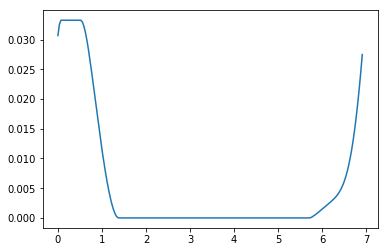

MSE : 386.62274461337694, beta : 2782.559402207128

Objectif : 1e+30, ||Ku-y||^2 : 2638.020956635817, ||Du||^2 : 34.475298056235026, ind : 1e+30
Objectif : 1330.3742455986035, ||Ku-y||^2 : 1035.0966553232865, ||Du||^2 : 0.16256518358739186, ind : 0
Objectif : 1288.5317307204455, ||Ku-y||^2 : 848.7484351498822, ||Du||^2 : 0.17283150262910074, ind : 0
Objectif : 1371.6454221731415, ||Ku-y||^2 : 950.2824526163676, ||Du||^2 : 0.1793008391729914, ind : 0
Objectif : 1325.6353283307317, ||Ku-y||^2 : 828.5512535615246, ||Du||^2 : 0.1822719403099937, ind : 0
Objectif : 1376.7656427614158, ||Ku-y||^2 : 933.0285682006064, ||Du||^2 : 0.18205027173222238, ind : 0
Objectif : 1325.6055384229985, ||Ku-y||^2 : 829.710998691245, ||Du||^2 : 0.18215000781547505, ind : 0
Objectif : 1374.0508069062003, ||Ku-y||^2 : 933.9164747304565, ||Du||^2 : 0.18141851390819427, ind : 0
Objectif : 1320.0222887308773, ||Ku-y||^2 : 830.004296265608, ||Du||^2 : 0.18100402811961452, ind : 0
Objectif : 1367.9965467796205, ||K

Objectif : 1361.9683882357613, ||Ku-y||^2 : 828.9591248931401, ||Du||^2 : 0.18949776515783806, ind : 0
Objectif : 1414.2681481466939, ||Ku-y||^2 : 936.5912018914914, ||Du||^2 : 0.18919450944018945, ind : 0
Objectif : 1361.9700781689703, ||Ku-y||^2 : 828.9459723739247, ||Du||^2 : 0.18949941839640141, ind : 0
Objectif : 1414.2833930707145, ||Ku-y||^2 : 936.6054264122297, ||Du||^2 : 0.18919613597291976, ind : 0
Objectif : 1361.9717890592442, ||Ku-y||^2 : 828.9328165304897, ||Du||^2 : 0.1895010761587997, ind : 0
Objectif : 1414.2986625221567, ||Ku-y||^2 : 936.6196548089451, ||Du||^2 : 0.18919776702353666, ind : 0
Objectif : 1361.9735209228832, ||Ku-y||^2 : 828.9196573620296, ||Du||^2 : 0.1895027384483735, ind : 0
Objectif : 1414.3139565182646, ||Ku-y||^2 : 936.6338870827287, ||Du||^2 : 0.18919940259537987, ind : 0
Objectif : 1361.9752737761994, ||Ku-y||^2 : 828.906494867742, ||Du||^2 : 0.1895044052684655, ind : 0
Objectif : 1414.3292750762898, ||Ku-y||^2 : 936.6481232346704, ||Du||^2 : 0.1

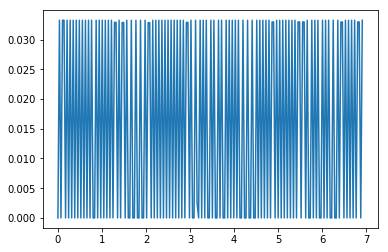

MSE : 961.4807576749338, beta : 10000.00000000001



In [105]:
beta_grid = np.exp(np.log(10)*np.linspace(-1,4,10))

def proximal_gradient_smooth_cons(lamb,K,y,T,xmin,xmax,display = False):
    tol = 1e-4
    max_iter = 200
    nb_iter = 0
    m = K.shape[0]
    n = K.shape[1]
    #print(np.dot(K.T,K))
    #w,v = np.linalg.eig(np.dot(K.T,K))
    #epsilon = 1/np.max(w)
    #print(epsilon)
    epsilon = 1e-4
    u = np.zeros((n,1))
    for i in range(n):
        u[i] = (random.random() - 0.5)
    norm2 = np.linalg.norm(np.dot(K,u) - y)
    normD = np.linalg.norm(np.dot(D,u))
    obj = 0.5*norm2**2 + 0.5*lamb * normD**2 + ind(u,xmin,xmax)
    last_obj = 0
    if display:
        print("Objectif : {}, ||Ku-y||^2 : {}, ||Du||^2 : {}, ind : {}".format(obj,norm2**2,normD**2,ind(u,xmin,xmax)))
    
    while abs(obj - last_obj) > tol and nb_iter < max_iter:
        w = u - epsilon * (np.dot(K.T,(np.dot(K,u) - y)) + lamb * np.dot(D.T,np.dot(D,u)))
        last_obj = obj
        u = prox_cons(w,xmin,xmax) 
        norm2 = np.linalg.norm(np.dot(K,u) - y)
        normD = np.linalg.norm(np.dot(D,u))
        obj = 0.5*norm2**2 + 0.5*lamb * normD**2 + ind(u,xmin,xmax)
        if display:
            print("Objectif : {}, ||Ku-y||^2 : {}, ||Du||^2 : {}, ind : {}".format(obj,norm2**2,normD**2,ind(u,xmin,xmax)))
        nb_iter += 1
    
    plt.plot(np.log(T),u)
    plt.show()
    return u
        
def prox_cons(w,xmin,xmax):
    n = w.shape[0]
    out = np.zeros((n,1))
    for index in range(n):
        value = w[index,1]
        if value >  xmax:
            out[index] = xmax
        elif value <  xmin:
            out[index] = xmin
        elif value >= xmin and value <= xmax:
            out[index] = value
    #print(out)
    return out

def ind(x,xmin,xmax):
    n = x.shape[0]
    for i in range(n):
        if x[i] > xmax or x[i] < xmin:
            return 1e30
    return 0

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = proximal_gradient_smooth_cons(beta,K,y,T,xmin,xmax,True) #,True
    print("MSE : {}, beta : {}\n".format(normalized_MSE(x_hat,x),beta))

### Sparsity 


Objectif : 51.69458477654833, ||Ku-y||^2 : 103.38821474764637, ||u|| : 0.47740272514694776
Objectif : 51.28151612446091, ||Ku-y||^2 : 102.56207828121326, ||u|| : 0.4769838542746867
Objectif : 50.88111718641388, ||Ku-y||^2 : 101.76128107368797, ||u|| : 0.47664956989459684
Objectif : 50.49322671193434, ||Ku-y||^2 : 100.98550036579168, ||u|| : 0.4765290385011916
Objectif : 50.11768329565941, ||Ku-y||^2 : 100.23441332913515, ||u|| : 0.47663109183894614
Objectif : 49.75432770032536, ||Ku-y||^2 : 99.5077018466383, ||u|| : 0.47677700621620933
Objectif : 49.40300689973488, ||Ku-y||^2 : 98.8050595327644, ||u|| : 0.4771333526816576
Objectif : 49.06356253515353, ||Ku-y||^2 : 98.12616962780348, ||u|| : 0.4777212517906853
Objectif : 48.735841787177506, ||Ku-y||^2 : 97.4707268989024, ||u|| : 0.4783377263038596
Objectif : 48.419694790129235, ||Ku-y||^2 : 96.83843104939352, ||u|| : 0.47926543247776887
Objectif : 48.11496948597, ||Ku-y||^2 : 96.22897852061733, ||u|| : 0.4802256613318091
Objectif : 47.8

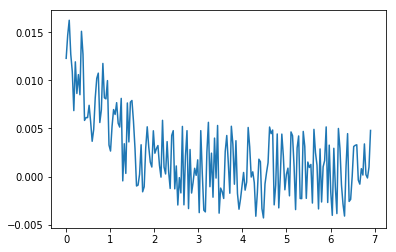

MSE : 198.71892278299546, beta : 0.0009999999999999994
Objectif : 56.04670961952737, ||Ku-y||^2 : 112.08334535669825, ||u|| : 0.503694117824453
Objectif : 55.50719598216308, ||Ku-y||^2 : 111.00434949101333, ||u|| : 0.5021236656418896
Objectif : 54.98198815473276, ||Ku-y||^2 : 109.9539573775419, ||u|| : 0.5009465961812645
Objectif : 54.4709231719378, ||Ku-y||^2 : 108.9318480685763, ||u|| : 0.4999137649646982
Objectif : 53.973786538896725, ||Ku-y||^2 : 107.9375890173441, ||u|| : 0.4992030224678012
Objectif : 53.49039981560562, ||Ku-y||^2 : 106.97082972369411, ||u|| : 0.4984953758563597
Objectif : 53.02061655913959, ||Ku-y||^2 : 106.03127593131062, ||u|| : 0.4978593484281812
Objectif : 52.564239354412834, ||Ku-y||^2 : 105.11852973804238, ||u|| : 0.49744853916423226
Objectif : 52.121107483517235, ||Ku-y||^2 : 104.23227193652004, ||u|| : 0.4971515257221057
Objectif : 51.69104125142442, ||Ku-y||^2 : 103.37214537547332, ||u|| : 0.4968563687760491
Objectif : 51.27387462878669, ||Ku-y||^2 : 102

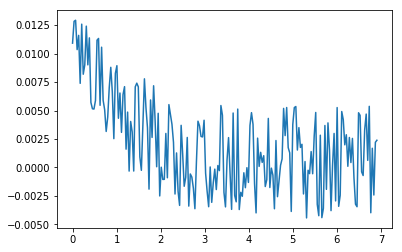

MSE : 199.14084897821118, beta : 0.009999999999999995
Objectif : 52.870628958157276, ||Ku-y||^2 : 105.63986519954528, ||u|| : 0.5069635838463591
Objectif : 52.42712448688517, ||Ku-y||^2 : 104.75305108709979, ||u|| : 0.5059894333527055
Objectif : 51.99691250011616, ||Ku-y||^2 : 103.89281295800583, ||u|| : 0.5050602111324416
Objectif : 51.579780382417475, ||Ku-y||^2 : 103.05866544908748, ||u|| : 0.5044765787373215
Objectif : 51.17538280803262, ||Ku-y||^2 : 102.24998235888417, ||u|| : 0.5039162859053978
Objectif : 50.783555137936816, ||Ku-y||^2 : 101.46643876148545, ||u|| : 0.5033575719408955
Objectif : 50.404136657432005, ||Ku-y||^2 : 100.70771322903164, ||u|| : 0.5028004291618184
Objectif : 50.03696838319659, ||Ku-y||^2 : 99.97348779640855, ||u|| : 0.5022448499231476
Objectif : 49.68206096163263, ||Ku-y||^2 : 99.26376507831455, ||u|| : 0.5017842247535628
Objectif : 49.33925515081569, ||Ku-y||^2 : 98.57818817336205, ||u|| : 0.5016106413466147
Objectif : 49.0082168771764, ||Ku-y||^2 : 97.

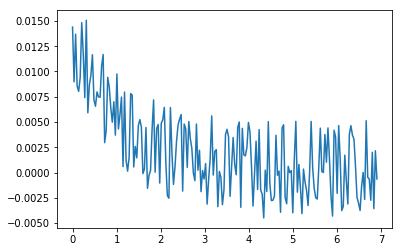

MSE : 199.35965531483814, beta : 0.09999999999999998
Objectif : 50.76525566384031, ||Ku-y||^2 : 100.46854950332742, ||u|| : 0.5309809121765962
Objectif : 50.39446091513817, ||Ku-y||^2 : 99.73084696156157, ||u|| : 0.5290374343573864
Objectif : 50.037025332432016, ||Ku-y||^2 : 99.01970773604776, ||u|| : 0.5271714644081309
Objectif : 49.69151417436146, ||Ku-y||^2 : 98.3321899192073, ||u|| : 0.5254192147578123
Objectif : 49.35893033462014, ||Ku-y||^2 : 97.67034064710798, ||u|| : 0.523760011066151
Objectif : 49.03999121418545, ||Ku-y||^2 : 97.03546564044514, ||u|| : 0.5222583939628769
Objectif : 48.733229437191895, ||Ku-y||^2 : 96.42432634552551, ||u|| : 0.5210662644291348
Objectif : 48.44030106687031, ||Ku-y||^2 : 95.84074070286667, ||u|| : 0.5199307154369791
Objectif : 48.160062476131074, ||Ku-y||^2 : 95.28139917556454, ||u|| : 0.5193628883488022
Objectif : 47.891950186208206, ||Ku-y||^2 : 94.74603570503356, ||u|| : 0.518932333691423
Objectif : 47.63411656921621, ||Ku-y||^2 : 94.231022369

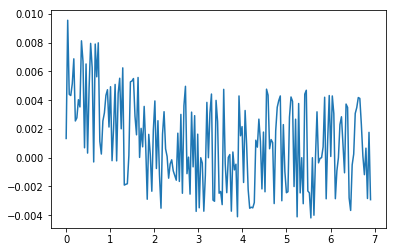

MSE : 198.1236589225531, beta : 1.0
Objectif : 54.38608977727352, ||Ku-y||^2 : 99.50027937881724, ||u|| : 0.46359500878648996
Objectif : 53.874546058791296, ||Ku-y||^2 : 98.86021250370202, ||u|| : 0.4444439806940286
Objectif : 53.4143727418275, ||Ku-y||^2 : 98.30392363464722, ||u|| : 0.42624109245038905
Objectif : 52.98289199508476, ||Ku-y||^2 : 97.79515162347586, ||u|| : 0.40853161833468343
Objectif : 52.56601377323001, ||Ku-y||^2 : 97.30864294826375, ||u|| : 0.39116922990981373
Objectif : 52.16694017840623, ||Ku-y||^2 : 96.8500064101985, ||u|| : 0.3741936973306975
Objectif : 51.7748219429193, ||Ku-y||^2 : 96.40240531536332, ||u|| : 0.35736192852376414
Objectif : 51.39291160440998, ||Ku-y||^2 : 95.96788086872847, ||u|| : 0.34089711700457426
Objectif : 51.048109174125436, ||Ku-y||^2 : 95.5922582924165, ||u|| : 0.32519800279171823
Objectif : 50.7429289618612, ||Ku-y||^2 : 95.28067365012107, ||u|| : 0.31025921368006687
Objectif : 50.465120854904484, ||Ku-y||^2 : 95.00981333746847, ||u|| 

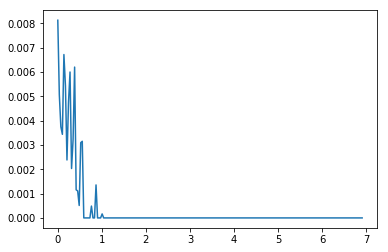

MSE : 196.41537288620586, beta : 10.000000000000002
Objectif : 101.52723043644103, ||Ku-y||^2 : 101.65094723298203, ||u|| : 0.5070175681995
Objectif : 82.67839929388632, ||Ku-y||^2 : 100.69454263340805, ||u|| : 0.3233112797718227
Objectif : 67.70091320191918, ||Ku-y||^2 : 100.44518073690763, ||u|| : 0.1747832283346536
Objectif : 57.78186721454623, ||Ku-y||^2 : 100.42308980275499, ||u|| : 0.07570322313168737
Objectif : 52.02824830615998, ||Ku-y||^2 : 100.54411130992594, ||u|| : 0.01756192651197014
Objectif : 50.63505302281693, ||Ku-y||^2 : 101.11957597548634, ||u|| : 0.0007526503507375895
Objectif : 50.642635784281715, ||Ku-y||^2 : 101.28527156856343, ||u|| : 0.0
Objectif : 50.642635784281715, ||Ku-y||^2 : 101.28527156856343, ||u|| : 0.0


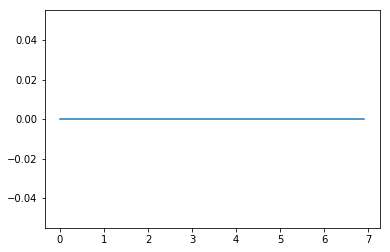

MSE : 200.00000000000003, beta : 100.00000000000004
Objectif : 564.7941487947584, ||Ku-y||^2 : 103.47601089138423, ||u|| : 0.5130561433490659
Objectif : 50.642635784281715, ||Ku-y||^2 : 101.28527156856343, ||u|| : 0.0
Objectif : 50.642635784281715, ||Ku-y||^2 : 101.28527156856343, ||u|| : 0.0


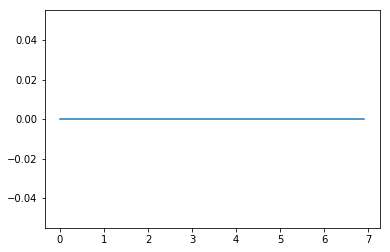

MSE : 200.00000000000003, beta : 1000.0000000000007


In [73]:
def proximal_gradient_norme1(lamb,K,y,T,display = False):
    tol = 1e-3
    max_iter = 100
    nb_iter = 0
    m = K.shape[0]
    n = K.shape[1]
    #print(np.dot(K.T,K))
    #w,v = np.linalg.eig(np.dot(K.T,K))
    #epsilon = 1/np.max(w)
    #print(epsilon)
    epsilon = 1e-5
    u = np.zeros((n,1))
    for i in range(n):
        u[i] = (random.random() - 0.5)/100
    norm2 = np.linalg.norm(np.dot(K,u) - y)
    norm1 = np.linalg.norm(u,1)
    obj = 0.5*norm2**2 + lamb * norm1
    last_obj = 0
    if display:
        print("Objectif : {}, ||Ku-y||^2 : {}, ||u|| : {}".format(obj,norm2**2,norm1))
    
    while abs(obj - last_obj) > tol and nb_iter < max_iter:
        w = u - epsilon * np.dot(K.T,(np.dot(K,u) - y))
        last_obj = obj
        u = prox_norme1(w,lamb,epsilon) 
        norm2 = np.linalg.norm(np.dot(K,u) - y)
        norm1 = np.linalg.norm(u,1)
        obj = 0.5*norm2**2 + lamb * norm1
        if display:
            print("Objectif : {}, ||Ku-y||^2 : {}, ||u|| : {}".format(obj,norm2**2,norm1))
        nb_iter += 1
    
    plt.plot(np.log(T),u)
    plt.show()
    return u
        
def prox_norme1(w,lamb,epsilon):
    n = w.shape[0]
    tol = 1e-9
    out = np.zeros((n,1))
    for index in range(n):
        value = w[index,1]
        if value >  epsilon * lamb + tol:
            out[index] = value - epsilon * lamb
        elif value <  -epsilon * lamb - tol:
            out[index] = value + epsilon * lamb 
        elif value >=  -epsilon * lamb - tol and value <= epsilon * lamb + tol:
            out[index] = 0
    #print(out)
    return out

for i in range(beta_grid.shape[0]):
    beta = beta_grid[i]
    x_hat = proximal_gradient_norme1(beta,K,y,T,True)
    print("MSE : {}, beta : {}".format(normalized_MSE(x_hat,x),beta))

In [15]:
def W(u):
    
    output = np.zeros(u.shape)
    for index,val in enumerate(u):
        
        if val >= 100:
            output[index] = val - log(val)
    
        if val < 100 and val > - 20 :
            w = 1
            v = 0
            while abs(w - v)/abs(w) > 1.e-8:
                v = w
                e = np.exp(w)
                f = w*e - val
                w = w - f/((e*(w+1) - (w+2)*f/(2*w+2)))
            output[index] = w
            
        if val <=-20:
            output[index] = 0
        
    return output
        

In [16]:
W(np.array([1,2,0]))

/home/maximilien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/home/maximilien/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


array([0.56714329, 0.8526055 , 0.        ])